In [1]:
# Introduction to Matplotlib

In [2]:
import json
import time
path = '/home/review.json'
f = open(path, 'r')

In [3]:
dataset = []
for i in range(50000):
    dataset.append(json.loads(f.readline()))

In [4]:
dataset[0]

{'review_id': 'Q1sbwvVQXV2734tPgoKj4Q',
 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA',
 'business_id': 'ujmEBvifdJM6h6RLv4wQIg',
 'stars': 1.0,
 'useful': 6,
 'funny': 1,
 'cool': 0,
 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.',
 'date': '2013-05-07 04:34:36'}

In [5]:
datasetWithTimeValues = []

In [6]:
for d in dataset:
    d['date']
    d['timeStruct'] = time.strptime(d['date'], '%Y-%m-%d %H:%M:%S')
    d['timeInt'] = time.mktime(d['timeStruct'])
    datasetWithTimeValues.append(d)

In [7]:
datasetWithTimeValues[0]

{'review_id': 'Q1sbwvVQXV2734tPgoKj4Q',
 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA',
 'business_id': 'ujmEBvifdJM6h6RLv4wQIg',
 'stars': 1.0,
 'useful': 6,
 'funny': 1,
 'cool': 0,
 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.',
 'date': '2013-05-07 04:34:36',
 'timeStruct': time.struct_time(tm_year=2013, tm_mon=5, tm_mday=7, tm_hour=4, tm_min=34, tm_sec=36, tm_wday=1, tm_yday=127, tm_isdst=-1),
 'timeInt': 1367922876.0}

In [8]:
# Generating come simple statistics

In [9]:
from collections import defaultdict

In [29]:
weekRatings = defaultdict(list)

In [30]:
for d in datasetWithTimeValues:
    day = d['timeStruct'].tm_wday
    weekRatings[day].append(d['stars'])

In [31]:
weekAverages = {}

In [32]:
for d in weekRatings:
    weekAverages[d] = sum(weekRatings[d]) * 1.0 / len(weekRatings[d])

In [33]:
weekAverages

{1: 3.7432353796915914,
 5: 3.759707232353306,
 2: 3.757839480591242,
 6: 3.724460242232754,
 4: 3.7557421194360843,
 0: 3.6925622212631275,
 3: 3.768303186907838}

In [34]:
# Creat plot from using weekAeverages keys as the x values and
# the averages for each day as the y values

In [51]:
X = list(weekAverages.keys())

In [52]:
X.sort()

In [53]:
Y = [weekAverages[x] for x in X]

In [54]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


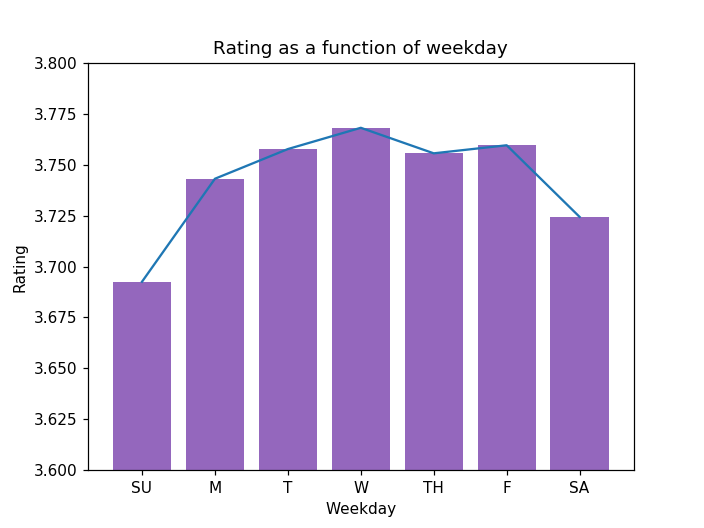

In [59]:
# Line Plot
plt.plot(X, Y)

In [60]:
# Bar Plot
plt.bar(X,Y)

<BarContainer object of 7 artists>

In [64]:
# Adding y limit and x/y labals. Plus x ticks and title to plot
plt.ylim(3.6, 3.8)
plt.xlabel('Weekday')
plt.ylabel('Rating')
plt.xticks([0,1,2,3,4,5,6],['SU','M','T','W','TH','F','SA'])
plt.title('Rating as a function of weekday')
plt.bar(X,Y)

<BarContainer object of 7 artists>